<a href="https://colab.research.google.com/github/ellamonnard/2024_Geoinformatique_I/blob/main/Copie_de_etape4_geotraitement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pooch

In [ ]:
import pooch

In [ ]:
!pip install geopandas

In [ ]:
import geopandas as gpd

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

zone_industrielle_path = '/content/drive/MyDrive/geoinf-proj-ze-4577.gpkg'

Mounted at /content/drive


In [ ]:
import pyogrio

In [ ]:
pyogrio.list_layers(zone_industrielle_path)

array([['ze_4577', 'MultiPolygon'],
       ['perimetre_ze_joint', 'Polygon'],
       ['perimetre_evaluation', 'Polygon']], dtype=object)

In [ ]:
zone_industrielle = gpd.read_file(zone_industrielle_path, layer = 'ze_4577')

In [ ]:
zone_industrielle.head()

,id,ABREVIATIO,CM,CODE_CH,CODE_COM,CODE_VD_N2,COS,DATE_EV,DATE_FIN,DESIGN_CH,...,REMARQ_TYP,SHAPE_AREA,SHAPE_LEN,SOUS_THEME,SPB,STATUT_JUR,SURFACE,SYMBOLE,zid,geometry
0,43446,None,5,12,120101,1201,0.5,19980630,None,Zones d'activités économiques,...,None,41459.520,1300.772,None,None,En vigueur,41459.52,None,136,"MULTIPOLYGON (((2529582.936 1157965.501, 25296..."
1,23381,None,5,12,120101,1201,0.5,19980630,None,Zones d'activités économiques,...,None,4248.543,311.157,None,None,En vigueur,4248.54,None,136,"MULTIPOLYGON (((2529823.829 1158102.27, 252982..."
2,63691,None,5,12,120101,1201,0.5,19980630,None,Zones d'activités économiques,...,None,52037.651,1412.586,None,None,En vigueur,52037.65,None,136,"MULTIPOLYGON (((2529678.62 1158454.824, 252970..."
3,74079,None,5,12,120101,1201,0.5,19980630,None,Zones d'activités économiques,...,None,47276.139,1116.593,None,None,En vigueur,47277.70,None,136,"MULTIPOLYGON (((2529693.793 1157715.669, 25296..."


In [ ]:
from shapely.ops import unary_union

In [ ]:
merged_geometry = unary_union(zone_industrielle.geometry)

In [ ]:
buffer_500m = merged_geometry.buffer(500)
buffer_1km = merged_geometry.buffer(1000)
buffer_5km = merged_geometry.buffer(5000)


In [ ]:
ring_1km = buffer_1km.difference(buffer_500m)
ring_5km = buffer_5km.difference(buffer_1km)

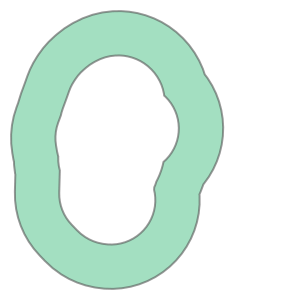

In [ ]:
ring_1km

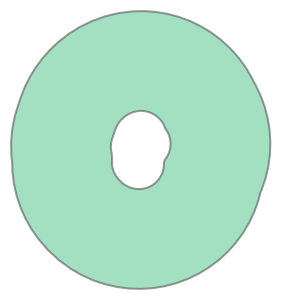

In [ ]:
ring_5km

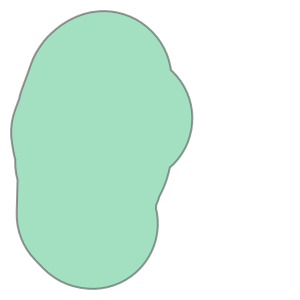

In [ ]:
buffer_500m

In [ ]:
communes_path = '/content/drive/MyDrive/swissBOUNDARIES3D_1_5_LV95_LN02.gpkg'

In [ ]:
pyogrio.list_layers(communes_path)

array([['tlm_hoheitsgrenze', 'LineString Z'],
       ['tlm_hoheitsgebiet', 'MultiPolygon Z'],
       ['tlm_bezirksgebiet', 'MultiPolygon Z'],
       ['tlm_landesgebiet', 'MultiPolygon Z'],
       ['tlm_kantonsgebiet', 'MultiPolygon Z']], dtype=object)

In [ ]:
communes = gpd.read_file(communes_path, layer = 'tlm_hoheitsgebiet')

In [ ]:
zi_buf = { '500m': buffer_500m, '1km': ring_1km, '5km': ring_5km }

In [ ]:
zi_buf_gdf = {
    k: gpd.GeoDataFrame(geometry=[poly], crs='EPSG:2056')
    for k, poly in zi_buf.items()
}

In [ ]:
zi_buf_gdf

{'500m':                                             geometry
 0  POLYGON ((2529067.69 1157857.107, 2529064.268 ...,
 '1km':                                             geometry
 0  POLYGON ((2528561.232 1157829.537, 2528549.733...,
 '5km':                                             geometry
 0  POLYGON ((2524892.25 1159943.175, 2524930.522 ...}

In [ ]:
zi_buf_cmnes = {}
for k, zone_industrielle in zi_buf_gdf.items():
    zi_buf_cmnes[k] = gpd.overlay(zone_industrielle, communes, how="intersection")



In [ ]:
zi_buf_gdf['500m']

,geometry
0,"POLYGON ((2529067.69 1157857.107, 2529064.268 ..."


In [ ]:
zi_buf_cmnes['500m']

,uuid,datum_aenderung,datum_erstellung,erstellung_jahr,erstellung_monat,grund_aenderung,herkunft,herkunft_jahr,herkunft_monat,revision_jahr,...,bezirksnummer,kantonsnummer,name,gem_flaeche,see_flaeche,icc,shn,einwohnerzahl,hist_nr,geometry
0,{FD4F95E1-DDFD-4A47-91DF-EF1381E00ECB},2023-10-24,2008-11-24,2006,1,Verbessert,swisstopo,2024,1,2024,...,2227.0,22.0,Romanel-sur-Morges,176.0,0.0,CH,CH22275645,460,14606.0,MULTIPOLYGON Z (((2530061.795 1157066.12 413.2...
1,{586AB008-EB41-4AFB-81DB-1D9F1B75F2CB},2023-10-24,2008-11-24,2006,1,Verbessert,swisstopo,2024,1,2024,...,2227.0,22.0,Gollion,545.0,0.0,CH,CH22275484,1030,14734.0,"POLYGON Z ((2529164.525 1158523.185 432.788, 2..."
2,{9056E8FB-F7D7-4C03-91F8-D46ACB525955},2023-10-24,2008-11-24,2006,1,Verbessert,swisstopo,2024,1,2024,...,2227.0,22.0,Aclens,390.0,0.0,CH,CH22275621,557,14781.0,"POLYGON Z ((2529064.268 1157867.707 444.425, 2..."
3,{B1D873BA-4B89-40C2-AA72-150712A39AC9},2023-10-24,2008-11-24,2006,1,Verbessert,swisstopo,2024,1,2024,...,2227.0,22.0,Bremblens,291.0,0.0,CH,CH22275622,606,14770.0,"POLYGON Z ((2529913.059 1156933.454 395.935, 2..."
4,{314FF984-84C1-4FE4-AD39-4A9B32523FA3},2023-10-24,2008-11-24,2006,1,Verbessert,swisstopo,2024,1,2024,...,2223.0,22.0,Vufflens-la-Ville,538.0,0.0,CH,CH22235503,1337,14908.0,"POLYGON Z ((2530151.075 1158800.931 409.215, 2..."


In [ ]:
zi_buf_cmnes['1km']

,uuid,datum_aenderung,datum_erstellung,erstellung_jahr,erstellung_monat,grund_aenderung,herkunft,herkunft_jahr,herkunft_monat,revision_jahr,...,bezirksnummer,kantonsnummer,name,gem_flaeche,see_flaeche,icc,shn,einwohnerzahl,hist_nr,geometry
0,{FD4F95E1-DDFD-4A47-91DF-EF1381E00ECB},2023-10-24,2008-11-24,2006,1,Verbessert,swisstopo,2024,1,2024,...,2227.0,22.0,Romanel-sur-Morges,176.0,0.0,CH,CH22275645,460,14606.0,MULTIPOLYGON Z (((2529374.668 1156405.568 446....
1,{586AB008-EB41-4AFB-81DB-1D9F1B75F2CB},2023-10-24,2008-11-24,2006,1,Verbessert,swisstopo,2024,1,2024,...,2227.0,22.0,Gollion,545.0,0.0,CH,CH22275484,1030,14734.0,"POLYGON Z ((2528786.09 1158912.376 426.879, 25..."
2,{9056E8FB-F7D7-4C03-91F8-D46ACB525955},2023-10-24,2008-11-24,2006,1,Verbessert,swisstopo,2024,1,2024,...,2227.0,22.0,Aclens,390.0,0.0,CH,CH22275621,557,14781.0,MULTIPOLYGON Z (((2528549.733 1157896.598 468....
3,{F661E081-0F7D-49AF-BC8F-3BCB066A80EA},2023-10-24,2008-11-24,2006,1,Verbessert,swisstopo,2024,1,2024,...,2229.0,22.0,Bussigny,481.0,0.0,CH,CH22295624,10365,15651.0,"POLYGON Z ((2530562.576 1156932.223 410.044, 2..."
4,{B1D873BA-4B89-40C2-AA72-150712A39AC9},2023-10-24,2008-11-24,2006,1,Verbessert,swisstopo,2024,1,2024,...,2227.0,22.0,Bremblens,291.0,0.0,CH,CH22275622,606,14770.0,"POLYGON Z ((2530245.387 1156553.758 394.456, 2..."
5,{314FF984-84C1-4FE4-AD39-4A9B32523FA3},2023-10-24,2008-11-24,2006,1,Verbessert,swisstopo,2024,1,2024,...,2223.0,22.0,Vufflens-la-Ville,538.0,0.0,CH,CH22235503,1337,14908.0,"POLYGON Z ((2530145.145 1159414.484 417.426, 2..."


In [ ]:
zi_buf_gdf['1km']

,geometry
0,"POLYGON ((2528561.232 1157829.537, 2528549.733..."


<Axes: >

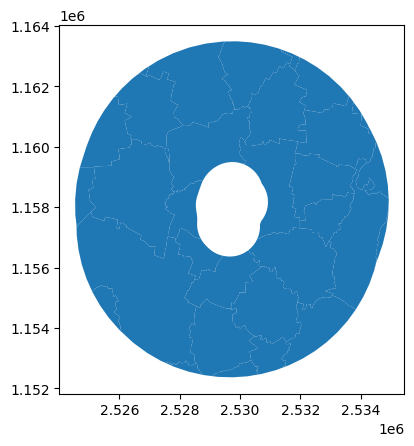

In [ ]:
zi_buf_cmnes['5km'].plot()

In [ ]:
ofs_geostat_path = '/content/drive/MyDrive/ofs_geostat.gpkg'

In [ ]:
pyogrio.list_layers(ofs_geostat_path)

array([['pop_2023', 'Point'],
       ['empl_2022', 'Point']], dtype=object)

In [ ]:
pts_lyr_habitants = gpd.read_file(ofs_geostat_path, layer = 'pop_2023')

In [ ]:
pts_lyr_emplois = gpd.read_file(ofs_geostat_path, layer = 'empl_2022')

In [ ]:
poly_lyr_500m = zi_buf_cmnes['500m']

In [ ]:
poly_lyr_1km = zi_buf_cmnes['1km']

In [ ]:
poly_lyr_5km = zi_buf_cmnes['5km']

In [ ]:
print(pts_lyr_habitants.columns)
print(poly_lyr_500m.columns)

Index(['E_KOORD', 'N_KOORD', 'BBTOT', 'BBTOT_entier', 'geometry'], dtype='object')
Index(['uuid', 'datum_aenderung', 'datum_erstellung', 'erstellung_jahr',
       'erstellung_monat', 'grund_aenderung', 'herkunft', 'herkunft_jahr',
       'herkunft_monat', 'revision_jahr', 'revision_monat',
       'revision_qualitaet', 'objektart', 'bfs_nummer', 'bezirksnummer',
       'kantonsnummer', 'name', 'gem_flaeche', 'see_flaeche', 'icc', 'shn',
       'einwohnerzahl', 'hist_nr', 'geometry'],
      dtype='object')


In [ ]:
def sjoin_summarize(poly_lyr_500m,pts_lyr_habitants,pts_colname='BBTOT_entier',poly_newcolname='pop_2023_sum'):

    # Faire d'abord une jointure spatiale pour associer chaque point à un polygone
    sjoin = pts_lyr_habitants.sjoin(poly_lyr_500m, how='inner', predicate='within')

    # Faire une opération «group by» selon l'index du polygone, et calculer la somme
    somme_par_poly = sjoin.groupby(sjoin.index_right)[pts_colname].sum()

    # Enregistrer le résultat dans la couche des polygones
    poly_lyr_500m[poly_newcolname] = poly_lyr_500m.index.map(somme_par_poly)

    return somme_par_poly

somme_par_poly = sjoin_summarize(poly_lyr_500m, pts_lyr_habitants)

print(somme_par_poly.head())

index_right
0     3
2    99
Name: BBTOT_entier, dtype: int32


In [ ]:
print(somme_par_poly.head())

index_right
0     3
2    99
Name: BBTOT_entier, dtype: int32


In [ ]:
def sjoin_summarize(poly_lyr_1km,pts_lyr_habitants,pts_colname='BBTOT_entier',poly_newcolname='pop_2023_sum'):
    """
    poly_lyr:         la couche des polygones
    pts_lyr:          la couche des points
    pts_colname:      la colonne sur laquelle il faut faire la somme
    poly_newcolname:  le nom de la colonne à créer dans la couche
                      des polygones
    """
    # Faire d'abord une jointure spatiale pour associer chaque point à un polygone
    sjoin = pts_lyr_habitants.sjoin(poly_lyr_1km, how='inner', predicate='within')

    # Faire une opération «group by» selon l'index du polygone, et calculer la somme
    somme_par_poly = sjoin.groupby(sjoin.index_right)[pts_colname].sum()

    # Enregistrer le résultat dans la couche des polygones
    poly_lyr_1km[poly_newcolname] = poly_lyr_1km.index.map(somme_par_poly)

    return somme_par_poly

somme_par_poly = sjoin_summarize(poly_lyr_1km, pts_lyr_habitants)

print(somme_par_poly.head())

index_right
1      9
2    482
5    238
Name: BBTOT_entier, dtype: int32


In [ ]:
def sjoin_summarize(poly_lyr_5km,pts_lyr_habitants,pts_colname='BBTOT_entier',poly_newcolname='pop_2023_sum'):
    """
    poly_lyr:         la couche des polygones
    pts_lyr:          la couche des points
    pts_colname:      la colonne sur laquelle il faut faire la somme
    poly_newcolname:  le nom de la colonne à créer dans la couche
                      des polygones
    """
    # Faire d'abord une jointure spatiale pour associer chaque point à un polygone
    sjoin = pts_lyr_habitants.sjoin(poly_lyr_5km, how='inner', predicate='within')

    # Faire une opération «group by» selon l'index du polygone, et calculer la somme
    somme_par_poly = sjoin.groupby(sjoin.index_right)[pts_colname].sum()

    # Enregistrer le résultat dans la couche des polygones
    poly_lyr_5km[poly_newcolname] = poly_lyr_5km.index.map(somme_par_poly)

    return somme_par_poly

somme_par_poly = sjoin_summarize(poly_lyr_5km, pts_lyr_habitants)

print(somme_par_poly.head())

index_right
0      59
2     518
3    2626
4      10
5     975
Name: BBTOT_entier, dtype: int32


In [ ]:
def sjoin_summarize(poly_lyr_500m,pts_lyr_emplois,pts_colname='B08EMPT_entier',poly_newcolname='empl_2022_sum'):
    """
    poly_lyr:         la couche des polygones
    pts_lyr:          la couche des points
    pts_colname:      la colonne sur laquelle il faut faire la somme
    poly_newcolname:  le nom de la colonne à créer dans la couche
                      des polygones
    """
    # Faire d'abord une jointure spatiale pour associer chaque point à un polygone
    sjoin = pts_lyr_emplois.sjoin(poly_lyr_500m, how='inner', predicate='within')

    # Faire une opération «group by» selon l'index du polygone, et calculer la somme
    somme_par_poly = sjoin.groupby(sjoin.index_right)[pts_colname].sum()

    # Enregistrer le résultat dans la couche des polygones
    poly_lyr_500m[poly_newcolname] = poly_lyr_500m.index.map(somme_par_poly)

    return somme_par_poly

somme_par_poly = sjoin_summarize(poly_lyr_500m, pts_lyr_emplois)

print(somme_par_poly.head())

index_right
0     238
2    1917
4     571
Name: B08EMPT_entier, dtype: int32


In [ ]:
def sjoin_summarize(poly_lyr_1km,pts_lyr_emplois,pts_colname='B08EMPT_entier',poly_newcolname='empl_2022_sum'):
    """
    poly_lyr:         la couche des polygones
    pts_lyr:          la couche des points
    pts_colname:      la colonne sur laquelle il faut faire la somme
    poly_newcolname:  le nom de la colonne à créer dans la couche
                      des polygones
    """
    # Faire d'abord une jointure spatiale pour associer chaque point à un polygone
    sjoin = pts_lyr_emplois.sjoin(poly_lyr_1km, how='inner', predicate='within')

    # Faire une opération «group by» selon l'index du polygone, et calculer la somme
    somme_par_poly = sjoin.groupby(sjoin.index_right)[pts_colname].sum()

    # Enregistrer le résultat dans la couche des polygones
    poly_lyr_1km[poly_newcolname] = poly_lyr_1km.index.map(somme_par_poly)

    return somme_par_poly

somme_par_poly = sjoin_summarize(poly_lyr_1km, pts_lyr_emplois)

print(somme_par_poly.head())

index_right
0     35
1      4
2    127
4    118
5     30
Name: B08EMPT_entier, dtype: int32


In [ ]:
def sjoin_summarize(poly_lyr_5km,pts_lyr_emplois,pts_colname='B08EMPT_entier',poly_newcolname='empl_2022_sum'):
    """
    poly_lyr:         la couche des polygones
    pts_lyr:          la couche des points
    pts_colname:      la colonne sur laquelle il faut faire la somme
    poly_newcolname:  le nom de la colonne à créer dans la couche
                      des polygones
    """
    # Faire d'abord une jointure spatiale pour associer chaque point à un polygone
    sjoin = pts_lyr_emplois.sjoin(poly_lyr_5km, how='inner', predicate='within')

    # Faire une opération «group by» selon l'index du polygone, et calculer la somme
    somme_par_poly = sjoin.groupby(sjoin.index_right)[pts_colname].sum()

    # Enregistrer le résultat dans la couche des polygones
    poly_lyr_5km[poly_newcolname] = poly_lyr_5km.index.map(somme_par_poly)

    return somme_par_poly

somme_par_poly = sjoin_summarize(poly_lyr_5km, pts_lyr_emplois)

print(somme_par_poly.head())

index_right
0      30
2      80
3     853
4       7
5    1362
Name: B08EMPT_entier, dtype: int32


In [ ]:
poly_lyr_500m

,uuid,datum_aenderung,datum_erstellung,erstellung_jahr,erstellung_monat,grund_aenderung,herkunft,herkunft_jahr,herkunft_monat,revision_jahr,...,name,gem_flaeche,see_flaeche,icc,shn,einwohnerzahl,hist_nr,geometry,pop_2023_sum,empl_2022_sum
0,{FD4F95E1-DDFD-4A47-91DF-EF1381E00ECB},2023-10-24,2008-11-24,2006,1,Verbessert,swisstopo,2024,1,2024,...,Romanel-sur-Morges,176.0,0.0,CH,CH22275645,460,14606.0,MULTIPOLYGON Z (((2530061.795 1157066.12 413.2...,3.0,238.0
1,{586AB008-EB41-4AFB-81DB-1D9F1B75F2CB},2023-10-24,2008-11-24,2006,1,Verbessert,swisstopo,2024,1,2024,...,Gollion,545.0,0.0,CH,CH22275484,1030,14734.0,"POLYGON Z ((2529164.525 1158523.185 432.788, 2...",NaN,NaN
2,{9056E8FB-F7D7-4C03-91F8-D46ACB525955},2023-10-24,2008-11-24,2006,1,Verbessert,swisstopo,2024,1,2024,...,Aclens,390.0,0.0,CH,CH22275621,557,14781.0,"POLYGON Z ((2529064.268 1157867.707 444.425, 2...",99.0,1917.0
3,{B1D873BA-4B89-40C2-AA72-150712A39AC9},2023-10-24,2008-11-24,2006,1,Verbessert,swisstopo,2024,1,2024,...,Bremblens,291.0,0.0,CH,CH22275622,606,14770.0,"POLYGON Z ((2529913.059 1156933.454 395.935, 2...",NaN,NaN
4,{314FF984-84C1-4FE4-AD39-4A9B32523FA3},2023-10-24,2008-11-24,2006,1,Verbessert,swisstopo,2024,1,2024,...,Vufflens-la-Ville,538.0,0.0,CH,CH22235503,1337,14908.0,"POLYGON Z ((2530151.075 1158800.931 409.215, 2...",NaN,571.0


In [ ]:
poly_lyr_1km

,uuid,datum_aenderung,datum_erstellung,erstellung_jahr,erstellung_monat,grund_aenderung,herkunft,herkunft_jahr,herkunft_monat,revision_jahr,...,name,gem_flaeche,see_flaeche,icc,shn,einwohnerzahl,hist_nr,geometry,pop_2023_sum,empl_2022_sum
0,{FD4F95E1-DDFD-4A47-91DF-EF1381E00ECB},2023-10-24,2008-11-24,2006,1,Verbessert,swisstopo,2024,1,2024,...,Romanel-sur-Morges,176.0,0.0,CH,CH22275645,460,14606.0,MULTIPOLYGON Z (((2529374.668 1156405.568 446....,NaN,35.0
1,{586AB008-EB41-4AFB-81DB-1D9F1B75F2CB},2023-10-24,2008-11-24,2006,1,Verbessert,swisstopo,2024,1,2024,...,Gollion,545.0,0.0,CH,CH22275484,1030,14734.0,"POLYGON Z ((2528786.09 1158912.376 426.879, 25...",9.0,4.0
2,{9056E8FB-F7D7-4C03-91F8-D46ACB525955},2023-10-24,2008-11-24,2006,1,Verbessert,swisstopo,2024,1,2024,...,Aclens,390.0,0.0,CH,CH22275621,557,14781.0,MULTIPOLYGON Z (((2528549.733 1157896.598 468....,482.0,127.0
3,{F661E081-0F7D-49AF-BC8F-3BCB066A80EA},2023-10-24,2008-11-24,2006,1,Verbessert,swisstopo,2024,1,2024,...,Bussigny,481.0,0.0,CH,CH22295624,10365,15651.0,"POLYGON Z ((2530562.576 1156932.223 410.044, 2...",NaN,NaN
4,{B1D873BA-4B89-40C2-AA72-150712A39AC9},2023-10-24,2008-11-24,2006,1,Verbessert,swisstopo,2024,1,2024,...,Bremblens,291.0,0.0,CH,CH22275622,606,14770.0,"POLYGON Z ((2530245.387 1156553.758 394.456, 2...",NaN,118.0
5,{314FF984-84C1-4FE4-AD39-4A9B32523FA3},2023-10-24,2008-11-24,2006,1,Verbessert,swisstopo,2024,1,2024,...,Vufflens-la-Ville,538.0,0.0,CH,CH22235503,1337,14908.0,"POLYGON Z ((2530145.145 1159414.484 417.426, 2...",238.0,30.0


In [ ]:
poly_lyr_5km.head()

,uuid,datum_aenderung,datum_erstellung,erstellung_jahr,erstellung_monat,grund_aenderung,herkunft,herkunft_jahr,herkunft_monat,revision_jahr,...,name,gem_flaeche,see_flaeche,icc,shn,einwohnerzahl,hist_nr,geometry,pop_2023_sum,empl_2022_sum
0,{BB491C4F-D76C-4CC7-A740-F9B4DD19A856},2023-11-08,2008-11-24,2006,1,Verbessert,swisstopo,2024,1,2024,...,Cheseaux-sur-Lausanne,459.0,0.0,CH,CH22255582,4517,14810.0,"POLYGON Z ((2534691.927 1159685.85 577.31, 253...",59.0,30.0
1,{97DB260B-16A0-49BC-8FE5-B0C5974B310D},2023-10-24,2008-11-24,2006,1,Verbessert,swisstopo,2024,1,2024,...,Boussens,316.0,0.0,CH,CH22235473,1006,14765.0,"POLYGON Z ((2533961.47 1161200.231 595.3, 2533...",NaN,NaN
2,{490F2FC3-8BE5-4DE4-A6AD-23F9B80C1EB0},2023-11-08,2008-11-24,2006,1,Verbessert,swisstopo,2024,1,2024,...,Bournens,391.0,0.0,CH,CH22235472,511,14766.0,"POLYGON Z ((2532146.67 1162884.483 548.618, 25...",518.0,80.0
3,{DA929CB5-3B6B-4A2D-8741-52AB7F9DDAC7},2023-10-24,2008-11-24,2006,1,Verbessert,swisstopo,2024,1,2024,...,Echichens,1327.0,0.0,CH,CH22275634,3208,15494.0,"POLYGON Z ((2527368.281 1152916.812 472.85, 25...",2626.0,853.0
4,{A96CB840-D4A7-453D-9F8E-2C66E8DECD5E},2023-10-24,2008-11-24,2006,1,Verbessert,swisstopo,2024,1,2024,...,Vaux-sur-Morges,210.0,0.0,CH,CH22275650,185,14874.0,"POLYGON Z ((2526027.39 1153915.018 482.637, 25...",10.0,7.0


In [ ]:
poly_lyr_500m['peri'] = '500m'

In [ ]:
poly_lyr_1km['peri'] = '1km'

In [ ]:
poly_lyr_5km['peri'] = '5km'

In [ ]:
data_500m = poly_lyr_500m[['bfs_nummer', 'name', 'peri', 'pop_2023_sum', 'empl_2022_sum']]

In [ ]:
data_1km = poly_lyr_1km[['bfs_nummer', 'name', 'peri', 'pop_2023_sum', 'empl_2022_sum']]

In [ ]:
data_5km = poly_lyr_5km[['bfs_nummer', 'name', 'peri', 'pop_2023_sum', 'empl_2022_sum']]

In [ ]:
import pandas as pd

In [ ]:
tableau = pd.concat([data_500m, data_1km, data_5km], ignore_index=True)

In [ ]:
tableau = tableau.fillna(0)

In [ ]:
print(tableau)

    bfs_nummer                   name  peri  pop_2023_sum  empl_2022_sum
0         5645     Romanel-sur-Morges  500m           3.0          238.0
1         5484                Gollion  500m           0.0            0.0
2         5621                 Aclens  500m          99.0         1917.0
3         5622              Bremblens  500m           0.0            0.0
4         5503      Vufflens-la-Ville  500m           0.0          571.0
5         5645     Romanel-sur-Morges   1km           0.0           35.0
6         5484                Gollion   1km           9.0            4.0
7         5621                 Aclens   1km         482.0          127.0
8         5624               Bussigny   1km           0.0            0.0
9         5622              Bremblens   1km           0.0          118.0
10        5503      Vufflens-la-Ville   1km         238.0           30.0
11        5582  Cheseaux-sur-Lausanne   5km          59.0           30.0
12        5473               Boussens   5km        

In [ ]:
tableau['Njsem'] = 0.3 * tableau['pop_2023_sum'] + 0.8 * tableau['empl_2022_sum']

In [ ]:
tableau['Nnsem'] = 0.9 * tableau['pop_2023_sum'] + 0.05 * tableau['empl_2022_sum']

In [ ]:
tableau['Njwe'] = 0.6 * tableau['pop_2023_sum'] + 0.05 * tableau['empl_2022_sum']

In [ ]:
tableau['Nnwe'] = tableau['pop_2023_sum']

In [ ]:
print(tableau)

    bfs_nummer                   name  peri  pop_2023_sum  empl_2022_sum  \
0         5645     Romanel-sur-Morges  500m           3.0          238.0   
1         5484                Gollion  500m           0.0            0.0   
2         5621                 Aclens  500m          99.0         1917.0   
3         5622              Bremblens  500m           0.0            0.0   
4         5503      Vufflens-la-Ville  500m           0.0          571.0   
5         5645     Romanel-sur-Morges   1km           0.0           35.0   
6         5484                Gollion   1km           9.0            4.0   
7         5621                 Aclens   1km         482.0          127.0   
8         5624               Bussigny   1km           0.0            0.0   
9         5622              Bremblens   1km           0.0          118.0   
10        5503      Vufflens-la-Ville   1km         238.0           30.0   
11        5582  Cheseaux-sur-Lausanne   5km          59.0           30.0   
12        54

In [ ]:
output_file = "personnes_par_peri_et_cmne.csv"
tableau.to_csv(output_file, index=False)

In [ ]:
data_peri = tableau[['peri', 'Njsem', 'Nnsem', 'Njwe', 'Nnwe']]

In [ ]:
data_peri_aggregated = data_peri.groupby('peri', as_index=False).sum()

In [ ]:
print(data_peri_aggregated.head())

   peri    Njsem    Nnsem     Njwe     Nnwe
0   1km    469.9    671.8    453.1    729.0
1  500m   2211.4    228.1    197.5    102.0
2   5km  45986.9  51617.0  35023.7  55311.0


In [ ]:
output_file_peri = "personnes_par_peri.csv"
data_peri_aggregated.to_csv(output_file_peri, index=False)

In [ ]:
data_cmne_aggregated = tableau.groupby(['bfs_nummer', 'name'], as_index=False).sum()

In [ ]:
print(data_cmne_aggregated.head())

   bfs_nummer                 name peri  pop_2023_sum  empl_2022_sum   Njsem  \
0        5472             Bournens  5km         518.0           80.0   219.4   
1        5473             Boussens  5km           0.0            0.0     0.0   
2        5474  La Chaux (Cossonay)  5km           0.0            0.0     0.0   
3        5477             Cossonay  5km        4654.0         1509.0  2603.4   
4        5480             Daillens  5km          14.0            4.0     7.4   

     Nnsem     Njwe    Nnwe  
0   470.20   314.80   518.0  
1     0.00     0.00     0.0  
2     0.00     0.00     0.0  
3  4264.05  2867.85  4654.0  
4    12.80     8.60    14.0  


In [ ]:
output_file_cmne = "personnes_par_cmne.csv"
data_cmne_aggregated.to_csv(output_file_cmne, index=False)